

<a href="https://colab.research.google.com/drive/1v8xv_X9IlIHMLxK7tlRRCzfq4lqoqiDO?usp=sharing" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Question Suggestion Feature

### Import Dependencies

In [38]:
import numpy as np
import tensorflow as tf
import pandas as pd

### Preproccessing

In [39]:
from tensorflow.keras.preprocessing.text import Tokenizer # type: ignore
from tensorflow.keras.preprocessing.sequence import pad_sequences # type: ignore
from sklearn.model_selection import train_test_split # type: ignore

In [40]:
# Load the dataset
df = pd.read_csv('../data/question-suggestion/data.csv')
df.head()

,Question,Category
0,Bagaimana cara memilih platform trading crypto...,Cryptocurrency
1,Apa itu cryptocurrency staking dan bagaimana c...,Cryptocurrency
2,Bagaimana cara mengenali proyek cryptocurrency...,Cryptocurrency
3,Apa saja teknik dasar dalam analisis teknikal ...,Cryptocurrency
4,Bagaimana cara melakukan trading cryptocurrenc...,Cryptocurrency


In [41]:
# Check duplicates and missing values
duplicates = df.duplicated().sum()
missing = df.isnull().sum().sum()

print(f'Duplicates: {duplicates}')
print(f'Missing: {missing}')

Duplicates: 189
Missing: 0


In [42]:
# Handle duplicates and missing values
df.drop_duplicates(inplace=True)
df.dropna(inplace=True)

In [43]:
# Check duplicates and missing values
duplicates = df.duplicated().sum()
missing = df.isnull().sum().sum()

print(f'Duplicates: {duplicates}')
print(f'Missing: {missing}')

Duplicates: 0
Missing: 0


In [44]:
# Separate questions and labels
questions = df['Question'].tolist()
labels = df['Category'].tolist()

print(f'questions: {questions[:5]}')
print(f'labels: {labels[:5]}')

questions: ['Bagaimana cara memilih platform trading cryptocurrency?', 'Apa itu cryptocurrency staking dan bagaimana cara kerjanya?', 'Bagaimana cara mengenali proyek cryptocurrency yang menjanjikan?', 'Apa saja teknik dasar dalam analisis teknikal cryptocurrency?', 'Bagaimana cara melakukan trading cryptocurrency secara aman?']
labels: ['Cryptocurrency', 'Cryptocurrency', 'Cryptocurrency', 'Cryptocurrency', 'Cryptocurrency']


In [45]:
# Convert categories to numerical labels
label_dict = {label: idx for idx, label in enumerate(set(labels))}
numerical_labels = [label_dict[label] for label in labels]

print(f'label_dict: {label_dict}')
print(f'numerical_labels: {numerical_labels[:5]}')

label_dict: {'Pajak': 0, 'Cryptocurrency': 1, 'Emas': 2, 'Manajemen keuangan pribadi': 3, 'Makro ekonomi': 4, 'Obligasi': 5, 'Saham': 6, 'Asuransi': 7, 'Reksadana': 8}
numerical_labels: [1, 1, 1, 1, 1]


In [46]:
# Tokenization and padding
tokenizer = Tokenizer(num_words=10000)
tokenizer.fit_on_texts(questions)
sequences = tokenizer.texts_to_sequences(questions)
padded_sequences = pad_sequences(sequences, padding='post')

In [47]:
print(tokenizer)
print(tokenizer.word_index)
print(sequences[:5])
print(padded_sequences[:5])

{'bagaimana': 1, 'cara': 2, 'apa': 3, 'itu': 4, 'dan': 5, 'saja': 6, 'dalam': 7, 'asuransi': 8, 'yang': 9, 'untuk': 10, 'reksadana': 11, 'emas': 12, 'obligasi': 13, 'pajak': 14, 'saham': 15, 'investasi': 16, 'kerjanya': 17, 'berinvestasi': 18, 'cryptocurrency': 19, 'memilih': 20, 'pendidikan': 21, 'dengan': 22, 'di': 23, 'kerja': 24, 'menggunakan': 25, 'ekonomi': 26, 'jenis': 27, 'keuangan': 28, 'terhadap': 29, 'risiko': 30, 'trading': 31, 'pasar': 32, 'memahami': 33, 'keuntungan': 34, 'mengelola': 35, 'menghitung': 36, 'harga': 37, 'kebijakan': 38, 'dalamnya': 39, 'membeli': 40, 'dari': 41, 'mendapatkan': 42, 'strategi': 43, 'tips': 44, 'inflasi': 45, 'mempengaruhi': 46, 'nilai': 47, 'melakukan': 48, 'pengaruhnya': 49, 'portofolio': 50, 'menentukan': 51, 'perusahaan': 52, 'pemerintah': 53, 'mengukur': 54, 'saat': 55, 'anak': 56, 'indikator': 57, 'negara': 58, 'faktor': 59, 'pengaruh': 60, 'penghasilan': 61, 'melaporkan': 62, 'antara': 63, 'secara': 64, 'mengatur': 65, 'kesehatan': 66,

In [48]:
# Convert numerical labels to a numpy array
numerical_labels = np.array(numerical_labels)
print(f'numerical_labels: {numerical_labels[:5]}')

numerical_labels: [1 1 1 1 1]


In [49]:
# Split the data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(padded_sequences, numerical_labels, test_size=0.2, random_state=42)

print(f'X_train: {X_train.shape}')
print(f'X_val: {X_val.shape}')
print(f'y_train: {y_train.shape}')
print(f'y_val: {y_val.shape}')

print(f'X_train: {X_train[:5]}')
print(f'X_val: {X_val[:5]}')
print(f'y_train: {y_train[:5]}')
print(f'y_val: {y_val[:5]}')

X_train: (800, 15)
X_val: (201, 15)
y_train: (800,)
y_val: (201,)
X_train: [[  1   2 143 183  15   0   0   0   0   0   0   0   0   0   0]
 [  1   2  20 104  10  40  12  92   0   0   0   0   0   0   0]
 [  3   4 438 150   7  19   0   0   0   0   0   0   0   0   0]
 [  3   4 263   7   8  66   0   0   0   0   0   0   0   0   0]
 [  1   2  24  11 276 355   0   0   0   0   0   0   0   0   0]]
X_val: [[  1   2 169 284  16  11   0   0   0   0   0   0   0   0   0]
 [  1   8  21 135 811 152  14   0   0   0   0   0   0   0   0]
 [  3   9  76  22  11 224   0   0   0   0   0   0   0   0   0]
 [  3  78  63 161 162 295 369   5 161 162 296 370   7 834 129]
 [  1   2  20   8 114   9  73   0   0   0   0   0   0   0   0]]
y_train: [6 2 1 7 8]
y_val: [8 7 8 1 7]


### Model

In [50]:
from tensorflow.keras.models import Sequential # type: ignore
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout, Bidirectional # type: ignore

In [51]:
num_classes = len(set(labels))
print(f'Number of unique categories: {num_classes}')

Number of unique categories: 9


In [52]:
# Define the model
model = tf.keras.Sequential([
    Embedding(input_dim=10000, output_dim=64),
    Bidirectional(LSTM(64)),
    Dense(64, activation='relu'),
    Dense(num_classes, activation='softmax')
])

In [53]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_1 (Embedding)         │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional_1 (Bidirectional) │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [54]:
# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [55]:
# Train the model
history = model.fit(X_train, y_train, epochs=21, validation_data=(X_val, y_val))

Epoch 1/21
25/25 ━━━━━━━━━━━━━━━━━━━━ 6s 28ms/step - accuracy: 0.1503 - loss: 2.1934 - val_accuracy: 0.1393 - val_loss: 2.1626
Epoch 2/21
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.1449 - loss: 2.1165 - val_accuracy: 0.2836 - val_loss: 1.8206
Epoch 3/21
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.5178 - loss: 1.4516 - val_accuracy: 0.8109 - val_loss: 0.6840
Epoch 4/21
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.8936 - loss: 0.4225 - val_accuracy: 0.8856 - val_loss: 0.3963
Epoch 5/21
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 20ms/step - accuracy: 0.9608 - loss: 0.1634 - val_accuracy: 0.9602 - val_loss: 0.2179
Epoch 6/21
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.9887 - loss: 0.0580 - val_accuracy: 0.9552 - val_loss: 0.1935
Epoch 7/21
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.9952 - loss: 0.0284 - val_accuracy: 0.9552 - val_loss: 0.1872
Epoch 8/21
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - accuracy: 0.9999 - loss: 0.0145 - val_accuracy: 0.9552 - v

loss: [2.1853137016296387, 2.0398874282836914, 1.1742336750030518, 0.31878527998924255, 0.1349037140607834, 0.04359715059399605, 0.029316553846001625, 0.016716748476028442, 0.01635415479540825, 0.017301343381404877, 0.013064389117062092, 0.007488529663532972, 0.007324380334466696, 0.006648635491728783, 0.005061537493020296, 0.0038674711249768734, 0.004977310076355934, 0.0058197095058858395, 0.0039945440366864204, 0.004813138395547867, 0.004926821682602167]
val_loss: [2.162644147872925, 1.8205851316452026, 0.6839918494224548, 0.39629119634628296, 0.21789368987083435, 0.19351020455360413, 0.1871887743473053, 0.2117239534854889, 0.17960546910762787, 0.18109403550624847, 0.17379045486450195, 0.19875767827033997, 0.19629622995853424, 0.23900790512561798, 0.17804379761219025, 0.19123442471027374, 0.19600935280323029, 0.18318486213684082, 0.18818573653697968, 0.18726660311222076, 0.1780349165201187]
accuracy: [0.1574999988079071, 0.2150000035762787, 0.6287500262260437, 0.9262499809265137, 0.9

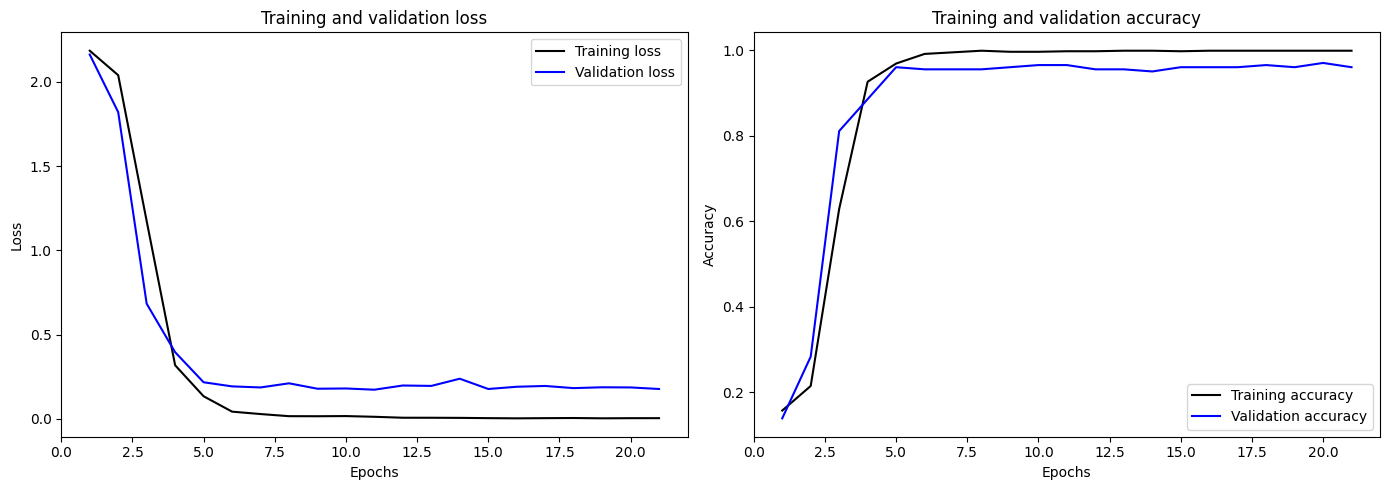

In [56]:
import matplotlib.pyplot as plt

# Function to plot the training history
def plot_training_history(history):
    # Extract the history data
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    accuracy = history.history['accuracy']
    val_accuracy = history.history['val_accuracy']
    epochs = range(1, len(loss) + 1)
    
    print(f'loss: {loss}')
    print(f'val_loss: {val_loss}')
    print(f'accuracy: {accuracy}')
    print(f'val_accuracy: {val_accuracy}')

    # Plot loss and validation loss
    plt.figure(figsize=(14, 5))

    plt.subplot(1, 2, 1)
    plt.plot(epochs, loss, 'k', label='Training loss')  # black for loss
    plt.plot(epochs, val_loss, 'b', label='Validation loss')  # blue for val_loss
    plt.title('Training and validation loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

    # Plot accuracy and validation accuracy
    plt.subplot(1, 2, 2)
    plt.plot(epochs, accuracy, 'k', label='Training accuracy')  # black for accuracy
    plt.plot(epochs, val_accuracy, 'b', label='Validation accuracy')  # blue for val_accuracy
    plt.title('Training and validation accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()

    plt.tight_layout()
    plt.show()

# Plot the training history
plot_training_history(history)


### Usage

In [78]:
# Function to predict top questions
def suggest_questions(user_input, total_questions=5):
    sequence = tokenizer.texts_to_sequences([user_input])
    padded_sequence = pad_sequences(sequence, maxlen=padded_sequences.shape[1], padding='post')
    predictions = model.predict(padded_sequence)
    labels = list(label_dict.keys())
    
    # Get top n categories with their probabilities
    top_categories_prediction = np.argsort(predictions[0])[-1:][::-1]
    top_categories = [(labels[idx], predictions[0][idx]) for idx in top_categories_prediction]
    
    # Print top categories with their probabilities
    print()
    print("Top category and with the probability:")
    for category, prob in top_categories:
        print(f'{category}: {prob:.4f}')
    
    # Filter questions from the dataset based on top categories
    suggested_questions = []
    for category, _ in top_categories:
        category_questions = df[df['Category'] == category]['Question'].tolist()
        suggested_questions.extend(category_questions)
    
    # return random n questions
    return np.random.choice(suggested_questions, total_questions)


# Example usage
user_input = "Bagaimana cara memilih asuransi yang tepat?"
# user_input = "Bagaimana cara memilih saham yang baik?"
# user_input = "Bagaimana cara membuat anggaran bulanan yang efektif?"
# user_input = "Apa itu cryptocurrency?"
# user_input = "Apa yang harus saya lakukan jika suku bunga naik?"
# user_input = "Bagaimana cara saya memilih reksadana?"
# user_input = "Bagaimana cara saya memilih reksadana yang baik?"


suggested_questions = suggest_questions(user_input)
print("Suggested questions:")
for question in suggested_questions:
    print(question)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 151ms/step

Top category and with the probability:
Asuransi: 0.9998
Suggested questions:
Bagaimana cara kerja asuransi kesehatan swasta?
Bagaimana cara mengelola premi asuransi agar tetap terjangkau?
Bagaimana cara memastikan asuransi pendidikan sesuai dengan kebutuhan anak?
Bagaimana cara memahami tabel premi asuransi?
Bagaimana cara kerja asuransi kendaraan komprehensif?


In [2]:
def get_float_input(prompt):
    while True:
        try:
            return float(input(prompt))
        except ValueError:
            print("Input tidak valid. Harap masukkan angka.")

# Function to get valid list of insurances from the user
def get_insurances_input(prompt):
    insurances = input(prompt).strip().lower()  # Convert input to lowercase
    if insurances == "-":
        return []
    elif insurances:
        return [insurance.strip() for insurance in insurances.split(",")]
    else:
        return []

def get_investments_input(prompt):
    investments = input(prompt).strip().lower()  # Convert input to lowercase
    if investments == "-":
        return []
    elif investments:
        return [investment.strip() for investment in investments.split(",")]
    else:
        return []

def generate_financial_advice_questions(income, savings, debts, insurances, investments, total_questions=5):
    questions = []

    if debts > 0:
        questions.extend([
            "Bagaimana cara melunasi utang dengan efektif?",
            "Apa strategi terbaik untuk mengelola utang yang ada?",
            "Bagaimana cara mengelola utang kartu kredit?",
            "Apa saja langkah-langkah untuk melunasi utang dengan cepat?",
            "Bagaimana cara memprioritaskan pembayaran utang?",
            "Bagaimana cara mengatur keuangan saat memiliki banyak utang?"
        ])
    else:
        questions.extend([
            "Bagaimana cara menjaga kondisi keuangan tanpa utang?",
            "Bagaimana cara menabung untuk liburan tanpa utang?"
        ])

    if savings < income:
        questions.extend([
            "Bagaimana cara meningkatkan tabungan bulanan?",
            "Apa tips untuk menabung secara konsisten?"
        ])

    if income < savings:
        questions.extend([
            "Bagaimana cara meningkatkan pendapatan bulanan?",
            "Apa saja sumber pendapatan tambahan yang bisa dicoba?"
        ])

    if "pendidikan" in insurances:
        questions.extend([
            "Apa saja kebijakan pembayaran premi dalam asuransi pendidikan?",
            "Bagaimana cara memilih asuransi pendidikan yang tepat?"
        ])

    if "kesehatan" in insurances:
        questions.extend([
            "Apa saja manfaat asuransi kesehatan yang harus diketahui?",
            "Bagaimana cara memilih asuransi kesehatan yang sesuai?"
        ])

    if "jiwa" in insurances:
        questions.extend([
            "Apa saja manfaat asuransi jiwa?",
            "Bagaimana cara memilih asuransi jiwa yang tepat?"
        ])

    # Investment-related questions
    if 'emas' in investments:
        questions.extend([
            "Bagaimana cara berinvestasi dalam emas?",
            "Apa keuntungan berinvestasi dalam emas?"
        ])

    if 'reksadana' in investments:
        questions.extend([
            "Apa tips untuk berinvestasi di reksadana?",
            "Bagaimana cara memilih reksadana yang baik?"
        ])

    if 'obligasi' in investments:
        questions.extend([
            "Bagaimana cara kerja obligasi?",
            "Apa keuntungan berinvestasi dalam obligasi?"
        ])

    if 'saham' in investments:
        questions.extend([
            "Bagaimana cara memilih saham yang baik?",
            "Apa tips untuk berinvestasi di saham?"
        ])

    if 'cryptocurrency' in investments:
        questions.extend([
            "Apa itu cryptocurrency?",
            "Bagaimana cara berinvestasi dalam cryptocurrency?"
        ])

    # Return random n questions from the suggested questions ensuring investment questions are included
    final_questions = np.random.choice(questions, min(total_questions, len(questions)), replace=False)

    return final_questions



In [3]:
income = get_float_input("Total pendapatan per bulan (masukan berupa angka tanpa tanda titik/koma). Jika belum berpendapatan bisa diisi '0': ")  # Pendapatan per bulan
investments = get_investments_input("Jenis investasi yang dipunya (e.g., saham, reksadana, obligasi, emas). Jika tidak ada harap diisi '-': ")
savings = get_float_input("Total tabungan atau investasi (masukan berupa angka tanpa tanda titik/koma). Jika tidak memiliki tabungan bisa diisi '0': ")# Tabungan atau investasi
# assets = get_float_input("Enter your total assets: ")  # Total aset
debts = get_float_input("Total utang (jika ada): ")  # Total utang
insurances = get_insurances_input("Jenis asuransi yang dipunya (e.g., pendidikan, kesehatan, jiwa). Jika tidak ada harap diisi '-': ")  # Asuransi yang dimiliki

In [115]:
# Generate financial advice questions based on user inputs

financial_advice_questions = generate_financial_advice_questions(income, savings, debts, insurances, investments)
print("Financial advice questions:")
for question in financial_advice_questions:
    print(question)

Financial advice questions:
Bagaimana cara meningkatkan pendapatan bulanan?
Bagaimana cara memprioritaskan pembayaran utang?
Bagaimana cara memilih saham yang baik?
Bagaimana cara mengelola utang kartu kredit?
Apa tips untuk berinvestasi di saham?


In [20]:
model.save("../models/question-suggestion/model_question_suggestion.h5")
# Save the model and tokenizer
import pickle
with open('../models/question-suggestion/tokenizer.pickle', 'wb') as handle:
    pickle.dump(tokenizer, handle, protocol=pickle.HIGHEST_PROTOCOL)
with open('../models/question-suggestion/label_dict.pickle', 'wb') as handle:
    pickle.dump(label_dict, handle, protocol=pickle.HIGHEST_PROTOCOL)